## Código Spectrogram

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import chirp
import scipy.io

Função para recolher as janelas

In [5]:
def cria_matriz(sinal, janela, passo):
    init = 0
    M = []
    a = 0
    win = np.hamming(janela)
    
    while True:   
        amostras = sinal[init:(init + janela)]
        if(len(amostras) == janela): 
            amostras = amostras[::-1]
            amostras = abs(np.fft.fftshift(np.fft.fft(amostras * win)))**2
            M = np.append(M,amostras)
            init += passo
            a += 1
        else:
            break
            
    M = M.reshape((a),janela).T
    linhas, colunas = M.shape
    linhas = int(np.ceil(linhas/2))
    final_matrix = M[0:linhas, 0:colunas]
   
    
    return final_matrix
    

Declarando um sinal senoidal e um chirp

In [6]:
T = 5
n = 100000
t = np.linspace(0, T, n, endpoint=False)
f0 = 100
f1 = 10000
y = chirp(t, f0, T, f1, method='linear')
w = np.sin(2*3.1417*2000*t)

In [7]:
A = cria_matriz(y,500,250)
B = cria_matriz(w,500,250)

Espectrograma do sinal Chirp

Text(0.5,1.05,'Chirp')

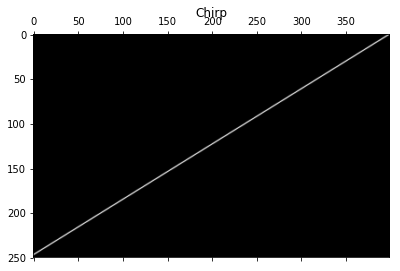

In [9]:
plt.matshow(A, cmap='gray',interpolation='bilinear')

plt.title('Chirp')


Espectrograma sinal Senoidal

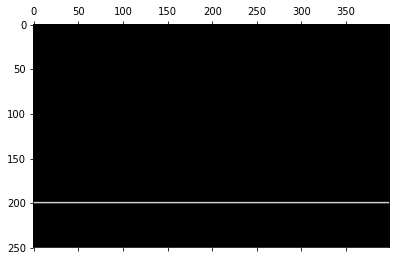

In [35]:
plt.matshow(B,cmap='gray',interpolation='bilinear')
plt.savefig('spce_sin.png', dpi=900, format = 'png')

Calcular o espectrograma de um sinal de ECG 

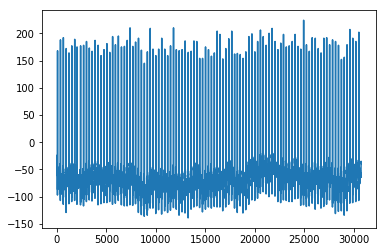

In [15]:
data = scipy.io.loadmat('ECG_1.mat')
y1 = data['x']
x1 = [row[0] for row in y1]
plt.plot(x1)

In [16]:
C = cria_matriz(x1, 200,100)

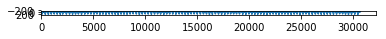

In [19]:
fig, ax = plt.subplots()
ax.imshow(C, cmap='gray',interpolation='bilinear')
ax.plot(x1)
